In [1]:
import pandas as pd
import numpy as np
jee = pd.read_csv('JEE_Dropout_After_Class_12.csv', delimiter=',')

## New Functionality

In [2]:
jee_v= pd.read_csv('JEE_Dropout_After_Class_12.csv', engine='pyarrow', dtype_backend='pyarrow')

In [3]:
import pandas as pd
import pyarrow as pa

print("Pandas:", pd.__version__)
print("PyArrow:", pa.__version__)

Pandas: 2.2.2
PyArrow: 14.0.2


In [4]:
import matplotlib.pyplot as plt

In [5]:
jee_v["admission_taken"]

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
4995    Yes
4996    Yes
4997    Yes
4998    Yes
4999     No
Name: admission_taken, Length: 5000, dtype: string[pyarrow]

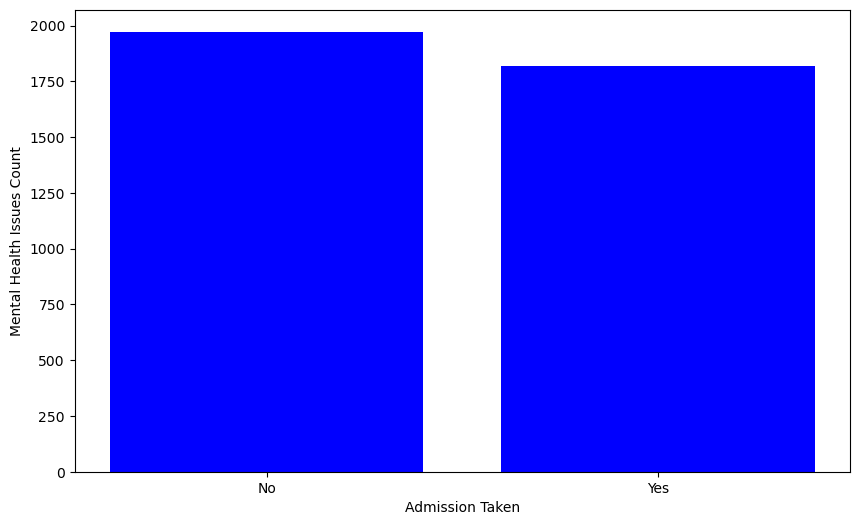

In [6]:
jee_new = jee_v.dropna(subset=['coaching_institute'])

plt.figure(figsize=(10,6))
plt.bar(jee_new["admission_taken"].unique(),jee_new["mental_health_issues"].value_counts(),color='blue')
plt.xlabel('Admission Taken')
plt.ylabel('Mental Health Issues Count')
plt.show()

In [7]:
jee_new["admission_taken"].unique()

<ArrowExtensionArray>
['No', 'Yes']
Length: 2, dtype: string[pyarrow]

In [8]:
jee_new["location_type"].unique()


<ArrowExtensionArray>
['Urban', 'Semi-Urban', 'Rural']
Length: 3, dtype: string[pyarrow]

In [9]:
jee_new["location_type"].unique()

<ArrowExtensionArray>
['Urban', 'Semi-Urban', 'Rural']
Length: 3, dtype: string[pyarrow]

In [10]:
jee_new.groupby("location_type")["mental_health_issues"].value_counts().values.tolist()


[633, 618, 675, 590, 665, 610]

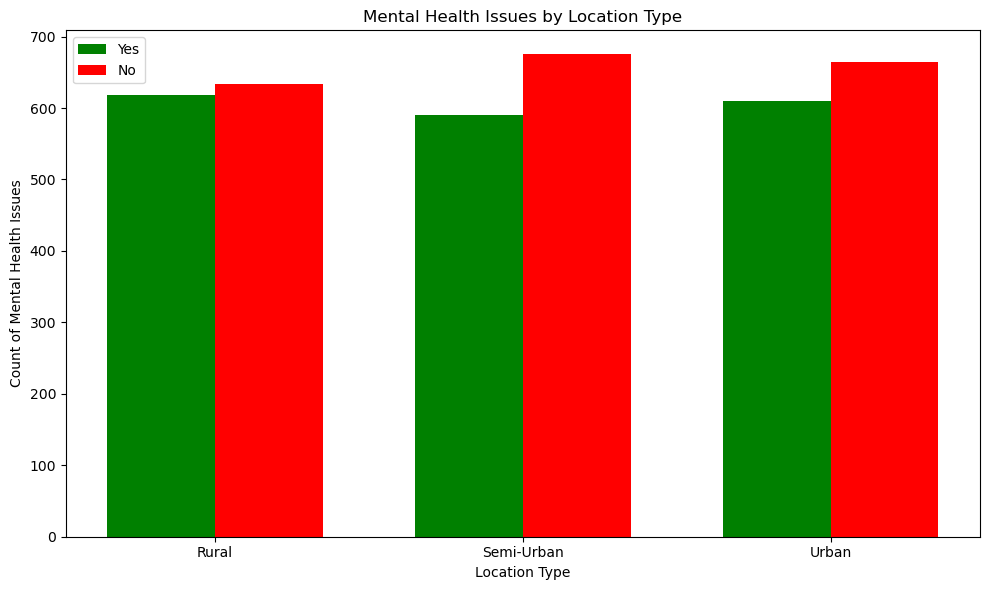

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get the counts for each mental_health_issues status per location
grouped = jee_new.groupby(["location_type", "mental_health_issues"]).size().unstack(fill_value=0)

# Step 2: Set up the bar positions
locations = grouped.index.tolist()
yes_counts = grouped["Yes"].tolist()
no_counts = grouped["No"].tolist()

x = np.arange(len(locations))  # the label locations
width = 0.35  # the width of the bars

# Step 3: Plot it
plt.figure(figsize=(10,6))
plt.bar(x - width/2, yes_counts, width, label='Yes', color='green')
plt.bar(x + width/2, no_counts, width, label='No', color='red')

# Step 4: Add labels and formatting
plt.xlabel('Location Type')
plt.ylabel('Count of Mental Health Issues')
plt.title('Mental Health Issues by Location Type')
plt.xticks(x, locations)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
grouped = jee_new.groupby(["location_type", "mental_health_issues"]).size().unstack(fill_value=0)
grouped

mental_health_issues,No,Yes
location_type,,
Rural,633,618
Semi-Urban,675,590
Urban,665,610


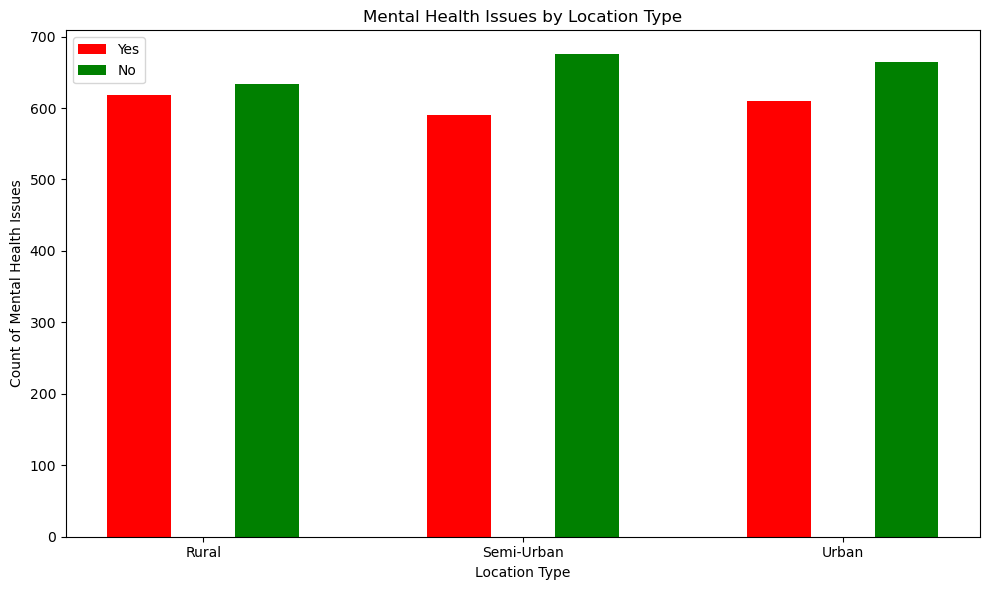

In [13]:
grouped= jee_new.groupby(["location_type", "mental_health_issues"]).size().unstack(fill_value=0)

locations = grouped.index.tolist()   # Takes the indices and makes it a list which are locations
yes_count=grouped["Yes"].tolist() # Takes the Yes column and makes it a list
no_count=grouped["No"].tolist() # Takes the No column and makes it a list

x = np.arange(len(locations)) # the label locations
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x-width, yes_count, width, label='Yes', color='Red')
plt.bar(x+width, no_count, width, label='No', color="Green")
plt.xlabel('Location Type')
plt.ylabel('Count of Mental Health Issues')
plt.title('Mental Health Issues by Location Type')
plt.xticks(x, locations)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
x = np.arange(len(locations))
v= x+0.2
v

array([0.2, 1.2, 2.2])

In [15]:
y= x-0.2
y

array([-0.2,  0.8,  1.8])